In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Data

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [2]:
df=pd.read_csv('C:/Users/Jenny.Son/OneDrive - TOWER New Zealand Limited/Documents/creditcard.csv')


In [3]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

# Data Exploration

In [4]:
df.shape

(284807, 31)

In [5]:
df.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


We can see from above graph that the class distribution is highly imbalanced so it is clear we need to apply sampling method to make sure the model does not overfit or entirely ignore fruad cases.

In [7]:

from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(df['Class'])
print(counter)
# scatter plot 
for label, _ in counter.items():
    row_ix = where(df['Class'] == label)[0]

Counter({0: 284315, 1: 492})


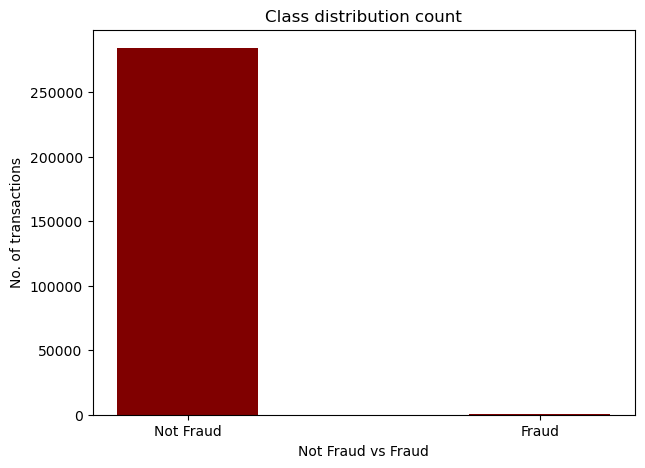

In [54]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Not Fraud':284315, 'Fraud':492}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (7, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)


plt.xlabel("Not Fraud vs Fraud")
plt.ylabel("No. of transactions")
plt.title("Class distribution count")
plt.show()


In [8]:
# check for the balance of data

print(f' Fraud vs. Non Fraud: \n {np.round(df["Class"].value_counts().sort_values() / len(df) * 100, 2)}')

 Fraud vs. Non Fraud: 
 1     0.17
0    99.83
Name: Class, dtype: float64


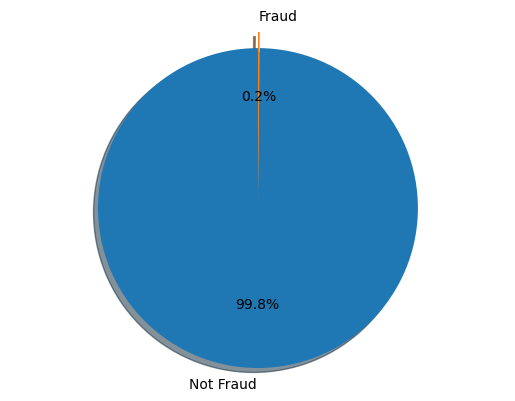

In [41]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not Fraud', 'Fraud'
sizes = [99.83, 0.17]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Fraud')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
# check for null values  - no null values to clean

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    22.00
1     9.25
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Median Amount for Fraud vs Non Fraud')

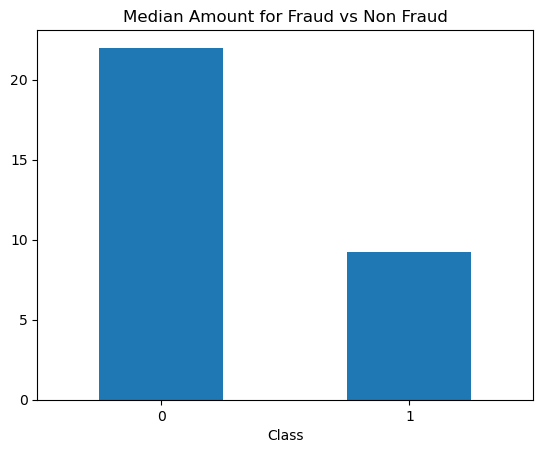

In [10]:
# Calculate median amount for each class

print(df.groupby('Class')['Amount'].median())
df.groupby('Class')['Amount'].median().plot.bar()
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)
plt.title('Median Amount for Fraud vs Non Fraud')


In [11]:
# aggregate info

aggrs = df.groupby('Class')['Amount'].agg(['max','min','median','mean'])
print(aggrs)

            max  min  median        mean
Class                                   
0      25691.16  0.0   22.00   88.291022
1       2125.87  0.0    9.25  122.211321


<AxesSubplot:title={'center':'Amount'}, xlabel='Class'>

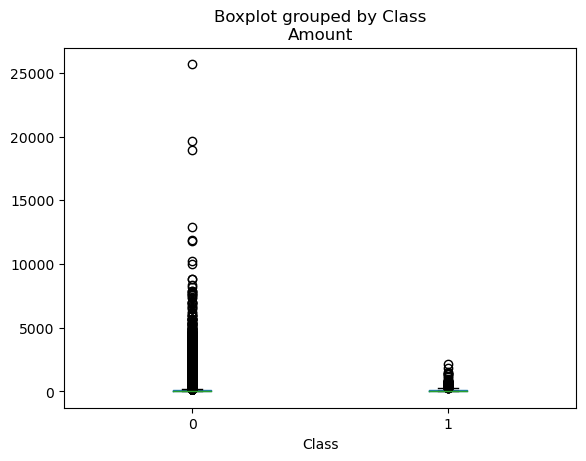

In [12]:
df.boxplot(by ='Class', column =['Amount'], grid = False)

# Apply Oversampling Method using SMOTE()

In [13]:
# seperate target and feature variables

y = df['Class']
X = df.drop(['Class'], axis=1)

X=np.array(X)
y=np.array(y)

In [14]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
df_X_resampled, df_y_resampled = oversample.fit_resample(X, df['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 284315, 1: 284315})


In [27]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
df_X_resampled2 = StandardScaler().fit_transform(X_r)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.3)

In [29]:
X_train.shape

(398041, 30)

In [30]:
y_train.shape

(398041,)

In [31]:
X_test.shape

(170589, 30)

In [32]:
y_test.shape

(170589,)

In [34]:
#Convert array to df for count purpose
df_y_resampled = pd.DataFrame(df_y_resampled, columns = ['Class'])

df_X_resampled = pd.DataFrame(df_X_resampled)

print(df_y_resampled)
print(type(df_y_resampled))

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
568625      1
568626      1
568627      1
568628      1
568629      1

[568630 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [35]:
# check for the balance of data

print(f' Fraud vs. Non Fraud: \n {np.round(df_y_resampled.value_counts().sort_values() / len(df_y_resampled) * 100, 2)}')

 Fraud vs. Non Fraud: 
 Class
0        50.0
1        50.0
dtype: float64


In [36]:
df_y_resampled.shape

(568630, 1)

In [37]:
df_X_resampled.shape

(568630, 30)

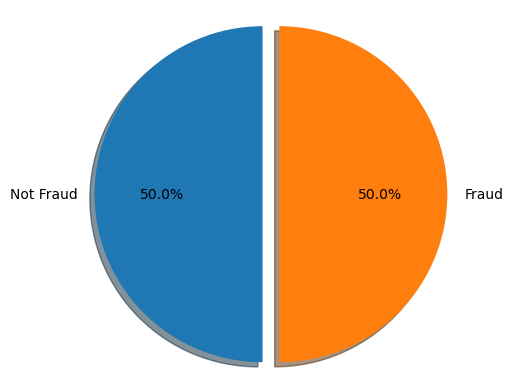

In [42]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not Fraud', 'Fraud'
sizes = [50, 50]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Fraud')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Check for Correlations for the features

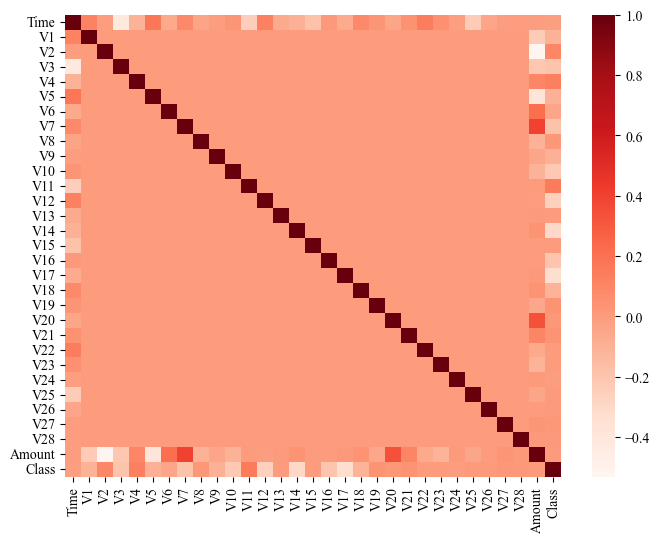

In [65]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)


plt.show()

The heatmap above shows various relationship between features and class in the dataset. 

You can see from the above graph the positive and negative linear correlations between the 'Class' feature and numerous other features. For example, if you look at the Class feature and V11, V4 and V2 has darker shade which means it has stronger positive correlations.  In contrast V17 and V14 and V12 has lighter shade which indicates negative correlations. 



# Model Build

The first iteration of models will keep the class imbalance ratios. These will be our benchmark models to test against when using over and undersampling

## First iteration of DNN models will keep the class imblance ratios.

In [71]:
# instantiate the scaler

scaler = StandardScaler()

In [110]:
# seperate target and feature variables

y = df['Class']
X = df.drop(['Class'], axis=1)

In [111]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42, shuffle=True)

# split train further into a validation set for DNN

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42, shuffle=True)

In [112]:
# standardize (fit + transform) training features first, to calculate the mean/std from training data. Fit this onto test dataset and validation dataset

X_train[['Time','Amount']] = scaler.fit_transform(X_train[['Time','Amount']])
X_train_std = X_train.copy()

# Standardize test features
X_test[['Time','Amount']] = scaler.transform(X_test[['Time','Amount']])

# Standardize
X_test_std = X_test.copy()

# Standarize training validation set for DNN
X_train_val[['Time','Amount']] = scaler.fit_transform(X_train_val[['Time','Amount']])

# Standardize
X_train_val_std = X_train_val.copy()

# Standardize test features
X_test_val[['Time','Amount']] = scaler.transform(X_test_val[['Time','Amount']])

# Standardize
X_test_val_std = X_test_val.copy()

In [105]:
# build sequential keras model

dnn = Sequential([
Dense(input_dim = 30, units = 30, activation = 'relu'),
Dense(units = 20, activation = 'relu'),
# dropout to minimise overfitting
Dropout(0.4),
Dense(units =1, activation = 'sigmoid'),])

In [76]:
# early stopping when val_loss has not minimized over 5 epochs

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15) # val_loss to prevent overfitting
# compile and fit model
dnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
dnn.fit(X_train_val_std, y_train_val, batch_size = 32, epochs = 100, callbacks = [es], validation_data = [X_test_val_std, y_test_val])

Epoch 1/100
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0131 - accuracy: 0.9981 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 2/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 4/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 5/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 6/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 7/100
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0037 -

In [77]:
# train results

dnn_acc = dnn.evaluate(X_train_val_std, y_train_val)
print(dnn_acc)

5697/5697 [==============================] - 7s 1ms/step - loss: 0.0012 - accuracy: 0.9997
[0.0012499422300606966, 0.9996927976608276]


In [80]:
# predict 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score

y_train_dnn_pred = dnn.predict(X_train_val_std)
# print metrics
train_dnn_mcc = matthews_corrcoef(y_train_val, y_train_dnn_pred.round())
train_dnn_recall = recall_score(y_train_val, y_train_dnn_pred.round())
train_dnn_f1 = f1_score(y_train_val, y_train_dnn_pred.round())
print(f'DNN train MCC: {train_dnn_mcc}')
print(f'DNN train recall: {train_dnn_recall}') 
print(f'DNN train F1 score: {train_dnn_f1}\n')
print(f'DNN train Confusion Matrix:\n\n {confusion_matrix(y_train_val, y_train_dnn_pred.round())}\n')

5697/5697 [==============================] - 6s 1ms/step
DNN train MCC: 0.9102964605515116
DNN train recall: 0.852760736196319
DNN train F1 score: 0.9084967320261437

DNN train Confusion Matrix:

 [[181942      8]
 [    48    278]]



# Concept drift 

## 1. Generate synthetic data

### Data Synthesizer

In [3]:
from DataSynthesizer.DataDescriber import DataDescriber

from DataSynthesizer.DataGenerator import DataGenerator

from DataSynthesizer.ModelInspector import ModelInspector

from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [ ]:

# input dataset

input_data = 'C:/Users/Jenny.Son/OneDrive - TOWER New Zealand Limited/Documents/creditcard.csv'

# location of two output files

mode = 'correlated_attribute_mode'

description_file = f'./out/description.json'

synthetic_data = f'./out/sythetic_data.csv'


categorical_attributes = {'Name': True, 'Sex':True, 'Ticket':True, 'Cabin': True, 'Embarked': True}

candidate_keys = {'PassengerId': True}


# An attribute is categorical if its domain size is less than this threshold.

threshold_value = 20

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not

# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).

# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.

epsilon = 1

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.

degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.

num_tuples_to_generate = 1000


describer = DataDescriber(category_threshold=threshold_value)

describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, epsilon=epsilon, k=degree_of_bayesian_network, attribute_to_is_categorical=categorical_attributes,    attribute_to_is_candidate_key=candidate_keys)


describer.save_dataset_description_to_file(description_file)

display_bayesian_network(describer.bayesian_network)


generator = DataGenerator()

generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)

generator.save_synthetic_data(synthetic_data)

# Read both datasets using Pandas.


synthetic_df = pd.read_csv(synthetic_data)

# Read attribute description from the dataset description file.

attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(titanic_df, synthetic_df, attribute_description)

inspector.mutual_information_heatmap()



================ Constructing Bayesian Network (BN) ================
Adding ROOT V27
Adding attribute V10
Adding attribute V1
Adding attribute V3
Adding attribute Time
Adding attribute V12
Adding attribute V13
Adding attribute V9
Adding attribute V14
Adding attribute V11
Adding attribute V4
Adding attribute V26
Adding attribute V24
Adding attribute V18
Adding attribute V19
Adding attribute V15


It took too long to generate using DataSynthesizer for even 1000 records so I have stopped it here and found alternative method.